Bussiness Problem : We have to segment the custumer on their buying behaviour and total spend
steps
1. Data Colection
2.Data Preprocessing
3.Exporatory Data Analysis
4.Finding the best value of K usng Elbow graph
5.modal building on Kmeans
6.plot the data along with ccluster no and annual income and spending scccore

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

Data Collecton and basic understending about data

In [2]:
df =pd.read_csv('/content/drive/MyDrive/data /Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
#check any null value
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
#check the duplicate
df.duplicated().sum()

0

#Perform EDA

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
gen =df.groupby(['Gender'] ,as_index =False)['Annual Income (k$)'].mean()
print(gen)

   Gender  Annual Income (k$)
0  Female           59.250000
1    Male           62.227273


<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

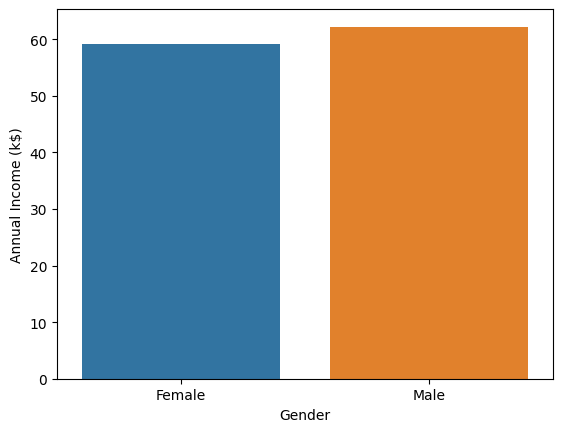

In [11]:
sns.barplot(x= 'Gender' ,y= 'Annual Income (k$)', data =gen)

In [12]:
spend =df.groupby(['Gender'] ,as_index =False)['Spending Score (1-100)'].mean()
print(spend)

   Gender  Spending Score (1-100)
0  Female               51.526786
1    Male               48.511364


<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

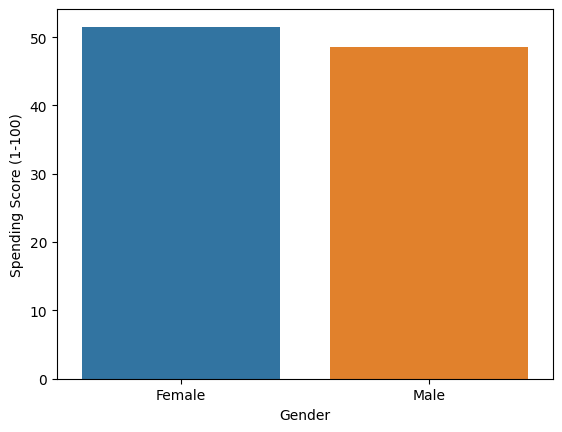

In [13]:
sns.barplot(x='Gender', y= 'Spending Score (1-100)' ,data = spend)

insight 1 = male has high annula inccome
insight 2 = female has high spending score (purcchaging power0 than man

# select the annual income and spending score feature for our model

In [14]:
x = df.iloc[:,3:5].values

In [15]:
print(x)


[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

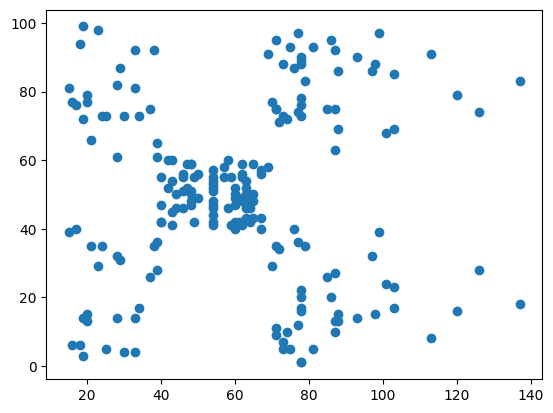

In [23]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

Find the value of K

In [17]:
#for finding the best vallue of K we use the WCSS method and polt the elow graph"'
WCSS= []

for i in range (1,11):
  Km =KMeans(n_clusters = i ,init = 'k-means++')
  Km.fit(x)

  WCSS.append(Km.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS value')

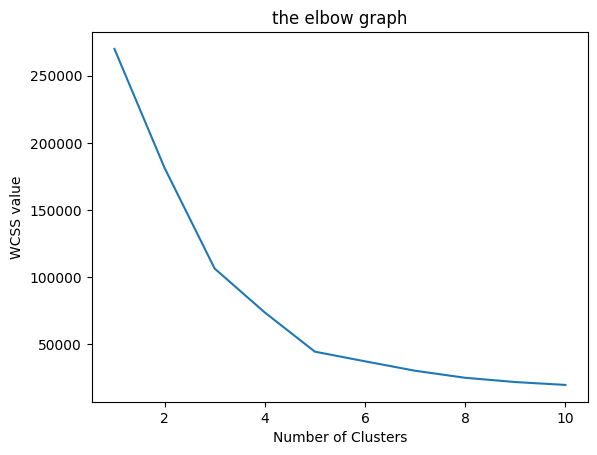

In [18]:
plt.plot(range(1,11),WCSS)
plt.title('the elbow graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS value')

with the help of elbow graph we choose that valaue of K fo rwhich there is no siginificat drop on the value of K (@we choose K=5)

In [24]:
print(WCSS)

[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37265.86520484346, 30241.34361793658, 24986.52564064288, 21809.92756261518, 19669.301557148297]


In [29]:
#now we train the model by taking the value of K = 5
KM = KMeans(n_clusters = 5)
km =KM.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
print(km)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [33]:
#boolean indexing
x[km==0]
#all rows jo cluster no 0 m aa rhe h

array([[ 70,  29],
       [ 71,  11],
       [ 71,   9],
       [ 73,   5],
       [ 73,   7],
       [ 74,  10],
       [ 75,   5],
       [ 77,  12],
       [ 77,  36],
       [ 78,  22],
       [ 78,  17],
       [ 78,  20],
       [ 78,  16],
       [ 78,   1],
       [ 78,   1],
       [ 79,  35],
       [ 81,   5],
       [ 85,  26],
       [ 86,  20],
       [ 87,  27],
       [ 87,  13],
       [ 87,  10],
       [ 88,  13],
       [ 88,  15],
       [ 93,  14],
       [ 97,  32],
       [ 98,  15],
       [ 99,  39],
       [101,  24],
       [103,  17],
       [103,  23],
       [113,   8],
       [120,  16],
       [126,  28],
       [137,  18]])

In [34]:
#if you want extract first vlaue thsn
x[km==0,1]

array([29, 11,  9,  5,  7, 10,  5, 12, 36, 22, 17, 20, 16,  1,  1, 35,  5,
       26, 20, 27, 13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16, 28,
       18])

Plot the value of cluster along with the annual income and spendong score
with the hepl of scatter plot



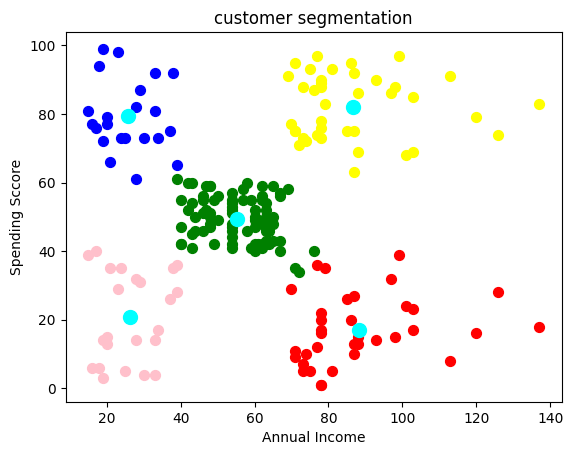

<Figure size 1000x1000 with 0 Axes>

In [50]:
plt.scatter(x[km==0,0],x[km==0,1], s=50,c='red', label = 'Cluster 1')
plt.scatter(x[km==1,0],x[km==1,1], s=50,c='green', label = 'Cluster 2')
plt.scatter(x[km==2,0],x[km==2,1], s=50,c='yellow', label = 'Cluster 3')
plt.scatter(x[km==3,0],x[km==3,1], s=50,c='blue', label = 'Cluster 4')
plt.scatter(x[km==4,0],x[km==4,1], s=50,c='pink', label = 'Cluster 5')

#plot centroid as well
plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1],s=100,c= 'cyan' ,label ='centoied')

plt.title('customer segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Sccore')
plt.figure(figsize=(10,10))
plt.show()



1.  pink cluster = less annual income and less spend(work on these cutomer sen d them offer)
2.  red = more annual income but spending score is also less (focus on these coustomers)
3.  green = average customers (daily basis only aware and send notification)
4.  blue = less income but still they spend more(relatinship bale bande)
5.  yellow = more income more spending score